In [82]:
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import csv
import pandas as pd
import numpy as np
from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise.model_selection import train_test_split
from collections import defaultdict


In [40]:
df=pd.read_csv('data/ratings.csv')
reader = Reader(rating_scale=(1,5))
rating_data=Dataset.load_from_df(df[['userId', 'movieId', 'rating']],reader)


In [42]:
#Question 17
meanMAE=[]
meanRMSE=[]
for k in range(2,101,2):
    algo=NMF(n_factors=k)
    ans=cross_validate(algo, rating_data, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    meanMAE.append(np.mean(ans.get('test_mae')))
    meanRMSE.append(np.mean(ans.get('test_rmse')))

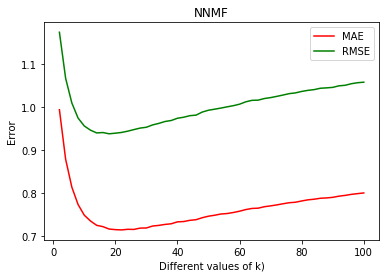

In [70]:
plt.plot(range(2,101,2),meanMAE,'r',label='MAE')
plt.plot(range(2,101,2),meanRMSE,'g',label='RMSE')
plt.legend(['MAE','RMSE'])
plt.xlabel('Different values of k)')
plt.ylabel('Error')
plt.title('NNMF')
plt.show()

In [59]:
def getPopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]>n,a))
    t=filter(lambda x:x[1] in pop,testset)
    return t
def getUnpopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]<=n,a))
    t=filter(lambda x:x[1] in pop,testset)
    return t
def getHighVariance(testset):
    testset=getPopular(testset,5)
    ans=(pd.DataFrame.from_records(testset).groupby(1)[2].var(ddof=False))
    af=pd.DataFrame.from_records(np.transpose([ans.index,ans.values]))
    high_var=af[af[1]>2]
    high_var=high_var[0]
    high_var=list(high_var)
    t=filter(lambda x:x[1] in high_var,testset)
    return t

In [51]:
#Question 19
#popular ones
from surprise.model_selection import KFold
from surprise import accuracy
popularMAE=[]
popularRMSE=[]
for k in range(2,51,2):
    algo=NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse=[]
    mae=[]
    print "Running for k = ",k
    for trainset, testset in kf.split(rating_data):
        
    # train and test algorithm.
        algo.fit(trainset)
        #testset=list(filter(lambda x:x[2]>2,testset))
        testset=getPopular(testset,2)
        predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
        rmse.append(accuracy.rmse(predictions, verbose=False))
        mae.append(accuracy.mae(predictions, verbose=False))
    popularMAE.append(np.mean(mae))
    popularRMSE.append(np.mean(rmse))
    

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


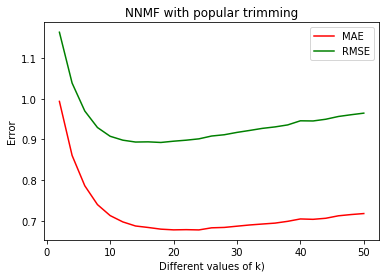

In [89]:
plt.plot(range(2,51,2),popularMAE,'r',label='MAE')
plt.plot(range(2,51,2),popularRMSE,'g',label='RMSE')
plt.legend(['MAE','RMSE'])
plt.xlabel('Different values of k)')
plt.ylabel('Error')
plt.title('NNMF with popular trimming')
plt.show()

In [87]:
popularRMSE

[1.163500058085742,
 1.0386264782799448,
 0.96995308215269627,
 0.92935917248340516,
 0.90784249137492556,
 0.8982720864150332,
 0.89367927570700267,
 0.89414741698885436,
 0.89264451027107938,
 0.89574928168633794,
 0.89824923213289742,
 0.9015240019120867,
 0.90845648408502444,
 0.91161467080719105,
 0.91736642013686998,
 0.92216719817830284,
 0.92724269884144683,
 0.93086577414452432,
 0.9357638397577569,
 0.94586987988688043,
 0.94546917185468016,
 0.94968691855078047,
 0.95648912687121757,
 0.96078712923784493,
 0.96468321513067623]

In [53]:
#Question 20
#unpopular ones
from surprise.model_selection import KFold
from surprise import accuracy
unpopularMAE=[]
unpopularRMSE=[]
for k in range(2,51,2):
    algo=NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse=[]
    mae=[]
    print "Running for k = ",k
    for trainset, testset in kf.split(rating_data):
        
    # train and test algorithm.
        algo.fit(trainset)
        #testset=list(filter(lambda x:x[2]>2,testset))
        testset=getUnpopular(testset,2)
        predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
        rmse.append(accuracy.rmse(predictions, verbose=False))
        mae.append(accuracy.mae(predictions, verbose=False))
    unpopularMAE.append(np.mean(mae))
    unpopularRMSE.append(np.mean(rmse))

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


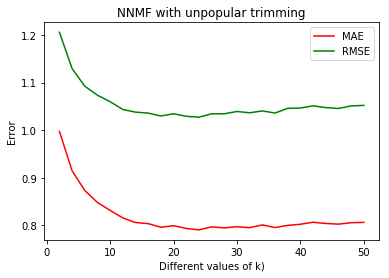

In [72]:
plt.plot(range(2,51,2),unpopularMAE,'r',label='MAE')
plt.plot(range(2,51,2),unpopularRMSE,'g',label='RMSE')
plt.legend(['MAE','RMSE'])
plt.xlabel('Different values of k)')
plt.ylabel('Error')
plt.title('NNMF with unpopular trimming')
plt.show()

In [60]:
#Question 21
#high variance ones
from surprise.model_selection import KFold
from surprise import accuracy
varianceMAE=[]
varianceRMSE=[]
for k in range(2,51,2):
    algo=NMF(n_factors=k)
    kf = KFold(n_splits=10)
    rmse=[]
    mae=[]
    print "Running for k = ",k
    for trainset, testset in kf.split(rating_data):
        
    # train and test algorithm.
        algo.fit(trainset)
        #testset=list(filter(lambda x:x[2]>2,testset))
        testset=getHighVariance(testset)
        predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
        rmse.append(accuracy.rmse(predictions, verbose=False))
        mae.append(accuracy.mae(predictions, verbose=False))
    varianceMAE.append(np.mean(mae))
    varianceRMSE.append(np.mean(rmse))

Running for k =  2
Running for k =  4
Running for k =  6
Running for k =  8
Running for k =  10
Running for k =  12
Running for k =  14
Running for k =  16
Running for k =  18
Running for k =  20
Running for k =  22
Running for k =  24
Running for k =  26
Running for k =  28
Running for k =  30
Running for k =  32
Running for k =  34
Running for k =  36
Running for k =  38
Running for k =  40
Running for k =  42
Running for k =  44
Running for k =  46
Running for k =  48
Running for k =  50


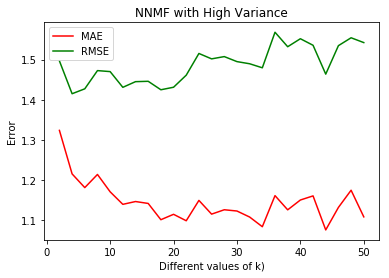

In [73]:
plt.plot(range(2,51,2),varianceMAE,'r',label='MAE')
plt.plot(range(2,51,2),varianceRMSE,'g',label='RMSE')
plt.legend(['MAE','RMSE'])
plt.xlabel('Different values of k)')
plt.ylabel('Error')
plt.title('NNMF with High Variance')
plt.show()

In [74]:
def plot_roc(actual, predicted, classifier_name):
    x, y, _ = roc_curve(actual, predicted)
    plt.plot([0, 1], [0, 1])
    plt.plot(x, y, label="ROC Curve")
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(classifier_name)
    plt.show()

ROC curve


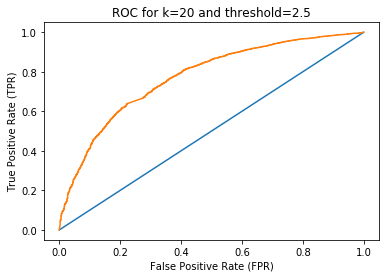

 Area under ROC for k=22 and threshold=2.5
0.772635418475
ROC curve


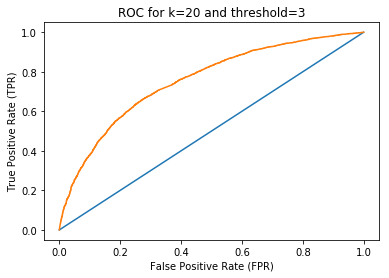

 Area under ROC for k=22 and threshold=3
0.754219588353
ROC curve


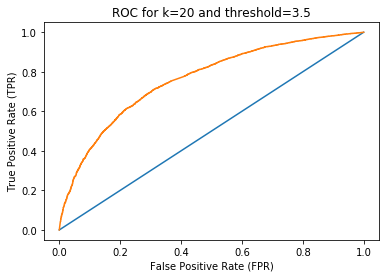

 Area under ROC for k=22 and threshold=3.5
0.761610866612
ROC curve


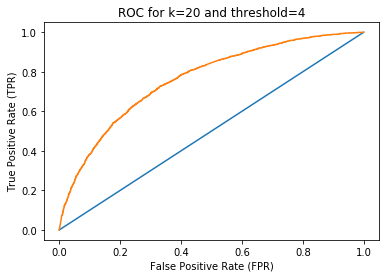

 Area under ROC for k=22 and threshold=4
0.761407877417


In [108]:
#Question 22
algo=NMF(n_factors=22)
trainset, testset = train_test_split(rating_data, test_size=.10)
algo.fit(trainset)
predictions = algo.test(testset)
actual=[]
pred=[]
for uid, iid, true_r, est, _ in predictions:
    pred.append(est)
actual=np.array(testset)[:,2]
actual = map(float, actual)

for threshold in [2.5,3,3.5,4]:
    testset_n=map(lambda x: 1 if x>threshold else 0,actual)
    print "ROC curve"
    plot_roc(testset_n,pred, "ROC for k=20 and threshold="+str(threshold))
    print" Area under ROC for k=22 and threshold="+str(threshold)
    print roc_auc_score(testset_n,pred)

In [107]:
print pred

[2.5290847976692024, 4.0861678750102879, 4.214364991641828, 3.7131381495878006, 4.1963441604688354, 2.461181981510046, 3.7912372141497701, 2.9694307851750139, 4.4613209312383226, 3.5540420763117351, 4.4270202478261265, 3.4519684906692345, 3.6273236324471791, 3.1071733033678064, 3.722108089881516, 3.852047824591712, 4.0546500651031998, 4.1076424849978554, 3.7532518326906876, 3.2855556322084483, 2.540440886781254, 3.5426541337510971, 3.1078933258821948, 4.4335705783541091, 3.8781981931754546, 3.3470686398287155, 2.3659380787372433, 3.1830545330902167, 3.5426541337510971, 4.7193826592677786, 3.581232554314818, 3.4501298314173616, 4.0141327740681536, 4.292995995631637, 4.6681598730752292, 3.9022221778228352, 2.4551924507693799, 3.8920649008728221, 4.207376497517064, 4.1876353914594535, 3.1444594418222156, 3.6365079734918768, 3.3480025701279472, 3.171904356677095, 2.0549964096275462, 3.5286477440073765, 3.5694564957923003, 3.1629559292496743, 4.2490721513649428, 4.1221692102684688, 3.716115

In [79]:
def getPR(predictions,k):
    userliked = defaultdict(list)
    actualliked=defaultdict(list)
    al=defaultdict(list)
    ul=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        userliked[uid].append((iid, est))
        actualliked[uid].append((iid,true_r))

    for uid, user_ratings in userliked.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        #u=filter(lambda x:x[1]>3,user_ratings)
        u=map(lambda x:x[0],user_ratings)
        if len(u)>0:
            ul[uid] = u
    for uid, user_ratings in actualliked.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        u=filter(lambda x:x[1]>3,user_ratings)
        u=map(lambda x:x[0],u)
        if len(u)>0:
            al[uid] = u
    valid_users=[]
    map(lambda x:valid_users.append(x) ,al.keys())
    count=0
    prec=0
    rec=0
    recall=[]
    precision=[]
    for u in valid_users:
        if len(ul.get(u))>=k:
            prec=prec+(len(set(al.get(u))&set(ul.get(u)[:k]))*1.0/k)
            rec=rec+(len(set(al.get(u))&set(ul.get(u)[:k]))*1.0/len(al.get(u)))
            precision.append((len(set(al.get(u))&set(ul.get(u)[:5]))*1.0/k))
            recall.append((len(set(al.get(u))&set(ul.get(u)[:5]))*1.0/len(al.get(u))))
            count=count+1
    return prec/count,rec/count

In [83]:
recall=[]
precision=[]
for i in range(1,26):
    print "Computing for k=",i
    algo=NMF(n_factors=22)
    kf = KFold(n_splits=10)
    prec=0
    rec=0

    for trainset, testset in kf.split(rating_data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        p,r=getPR(predictions,i)
        prec=prec+p
        rec=rec+r
        #print "precision ",p," recall ",r
    precision.append(prec/10)
    recall.append(rec/10)
    print precision
    print recall


Computing for k= 1
[0.8262241852602976]
[0.23140058592673124]
Computing for k= 2
[0.8262241852602976, 0.7922055595017544]
[0.23140058592673124, 0.3661661191970461]
Computing for k= 3
[0.8262241852602976, 0.7922055595017544, 0.7741884331535035]
[0.23140058592673124, 0.3661661191970461, 0.44547273931768966]
Computing for k= 4
[0.8262241852602976, 0.7922055595017544, 0.7741884331535035, 0.7691199939664124]
[0.23140058592673124, 0.3661661191970461, 0.44547273931768966, 0.49057586407631676]
Computing for k= 5
[0.8262241852602976, 0.7922055595017544, 0.7741884331535035, 0.7691199939664124, 0.7637886319940591]
[0.23140058592673124, 0.3661661191970461, 0.44547273931768966, 0.49057586407631676, 0.5126608633420704]
Computing for k= 6
[0.8262241852602976, 0.7922055595017544, 0.7741884331535035, 0.7691199939664124, 0.7637886319940591, 0.76082216527427]
[0.23140058592673124, 0.3661661191970461, 0.44547273931768966, 0.49057586407631676, 0.5126608633420704, 0.5340167967360762]
Computing for k= 7
[0.8

[0.8262241852602976, 0.7922055595017544, 0.7741884331535035, 0.7691199939664124, 0.7637886319940591, 0.76082216527427, 0.7614557423101711, 0.7602247313342562, 0.7607793415733172, 0.7581664779259492, 0.7522281281266845, 0.751386529850039, 0.750769573998149, 0.7502272884062012, 0.7474324905227909, 0.7455126905694879, 0.7468340482131396, 0.7433172476885892, 0.739665306476968, 0.7371267092680602, 0.7348655813186417]
[0.23140058592673124, 0.3661661191970461, 0.44547273931768966, 0.49057586407631676, 0.5126608633420704, 0.5340167967360762, 0.5489059808300618, 0.5610473703332844, 0.5797333235451828, 0.5891149211582334, 0.6011941045614203, 0.6082744672179697, 0.6249886714771464, 0.6236832824874444, 0.6384597329639745, 0.6353243158508621, 0.646373257046527, 0.653378321153797, 0.6580587133479521, 0.6660594650130235, 0.6762140482869248]
Computing for k= 22
[0.8262241852602976, 0.7922055595017544, 0.7741884331535035, 0.7691199939664124, 0.7637886319940591, 0.76082216527427, 0.7614557423101711, 0.7

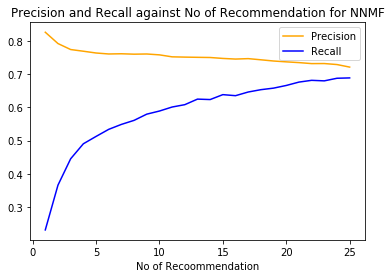

In [84]:
plt.plot(range(1,26),precision,'orange')
plt.plot(range(1,26),recall,'b')
plt.xlabel('No of Recoommendation')
plt.legend(['Precision','Recall'])
plt.title('Precision and Recall against No of Recommendation for NNMF')
plt.show()

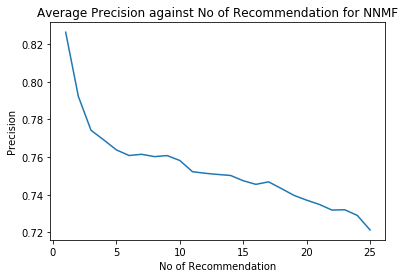

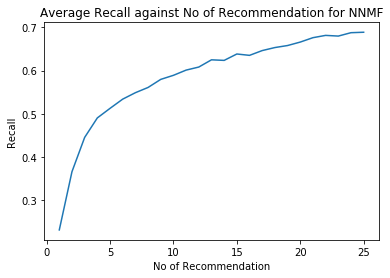

In [85]:
plt.plot(range(1,26),precision)
plt.xlabel('No of Recommendation')
plt.ylabel('Precision')
plt.title('Average Precision against No of Recommendation for NNMF')
plt.show()

plt.plot(range(1,26),recall)
plt.xlabel('No of Recommendation')
plt.ylabel('Recall')
plt.title('Average Recall against No of Recommendation for NNMF')
plt.show()

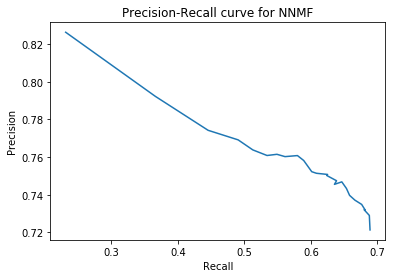

In [86]:
plt.plot(recall,precision)

plt.title('Precision-Recall curve for NNMF')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [137]:
#Question 23
mf=pd.read_csv('data/movies.csv')
algo=NMF(n_factors=20)
trainset=rating_data.build_full_trainset()
algo.fit(trainset)
genre=[]
movies=df.movieId
movies=np.unique(movies)
for k in range(1,20):
    print "k :",k
    genre=[]
    sortedList = sorted(zip(algo.qi[:,k],movies),reverse=True)
    list10=map(lambda x:x[1],sortedList[:10])
    for i in list10:
        genre.append(mf[mf.movieId==i]['genres'])
    print genre

#majority of them belong to Action drama comedy

k : 1
[1273    Crime|Drama|Film-Noir
Name: genres, dtype: object, 5582    Comedy
Name: genres, dtype: object, 2340    Comedy
Name: genres, dtype: object, 3592    Comedy|Mystery
Name: genres, dtype: object, 1201    Action|Drama|Thriller
Name: genres, dtype: object, 5678    Comedy|Romance
Name: genres, dtype: object, 660    Comedy|Romance
Name: genres, dtype: object, 4964    Drama|Romance
Name: genres, dtype: object, 5559    Adventure|Drama|Horror|Sci-Fi|Thriller
Name: genres, dtype: object, 1294    Drama|Mystery|Thriller
Name: genres, dtype: object]
k : 2
[3432    Western
Name: genres, dtype: object, 6994    Documentary
Name: genres, dtype: object, 3125    Drama
Name: genres, dtype: object, 5687    Comedy|Romance
Name: genres, dtype: object, 1603    Children|Comedy
Name: genres, dtype: object, 2843    Mystery|Thriller
Name: genres, dtype: object, 3790    Crime|Drama
Name: genres, dtype: object, 704    Action|Crime|Drama
Name: genres, dtype: object, 2290    Comedy
Name: genres, dtype: ob

In [128]:
 users=df.userId
users=np.unique(users)
   
algo.pu

users

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18